# Assignment 2: Build a CNN for image recognition.

## Due Date:  March 27, 11:59PM

### Name: Joshua Meharg


## Introduction:

1. In this assignment, you will build Convolutional Neural Network to classify CIFAR-10 Images.
2. You can directly load dataset from many deep learning packages.
3. You can use any deep learning packages such as pytorch, keras or tensorflow for this assignment.

## Requirements:

1. You need to load cifar 10 data and split the entire training dataset into training and validation.
2. You will implement a CNN model to classify cifar 10 images with provided structure.
3. You need to plot the training and validation accuracy or loss obtained from above step.
4. Then you can use tuned parameters to train using the entire training dataset.
5. You should report the testing accuracy using the model with complete data.
6. You may try to change the structure (e.g, add BN layer or dropout layer,...) and analyze your findings.

## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

## Batch Normalization (BN)

### Background:

- Batch Normalization is a technique to speed up training and help make the model more stable.
- In simple words, batch normalization is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

- For more detailed information, you may refer to the original paper: https://arxiv.org/pdf/1502.03167.pdf.

### BN Algorithm:

- Input: Values of $x$ over a mini-batch: $\mathbf{B}$ = $\{x_1,..., x_m\};$
- Output: $\{y_i = BN_{\gamma,\beta}(x_i)\}$, $\gamma, \beta$ are learnable parameters

Normalization of the Input:
$$\mu_{\mathbf{B}} = \frac{1}{m}\sum_{i=1}^m x_i$$
$$\sigma_{\mathbf{B}}^2 = \frac{1}{m}\sum_{i=1}^m (x_i - \mu_{\mathbf{B}})^2$$
$$\hat{x_i} = \frac{x_i - \mu_{\mathbf{B}}}{\sqrt{\sigma_{\mathbf{B}}}^2 + \epsilon}$$
Re-scaling and Offsetting:
$$y_i = \gamma \hat{x_i} + \beta = BN_{\gamma,\beta}(x_i)$$


### Advantages of BN:
1. Improves gradient flow through the network.
2. Allows use of saturating nonlinearities and higher learning rates.
3. Makes weights easier to initialize.
4. Act as a form of regularization and may reduce the need for dropout.

### Implementation:

- The batch normalization layer has already been implemented in many packages. You may simply call the function to build the layer. For example: torch.nn.BatchNorm2d() using pytroch package, keras.layers.BatchNormalization() using keras package.
- The location of BN layer: Please make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

## 1. Data preparation

### 1.1. Load data


In [ ]:
# Load Cifar-10 Data
# This is just an example, you may load dataset from other packages.
import keras
import numpy as np

### If you can not load keras dataset, un-comment these two lines.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels (5 points)

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Implement a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [ ]:
def to_one_hot(y, num_class=10):
    ret = [[]] * len(y)
    for i, e in enumerate(y):
        encode = [0] * 10
        encode[e[0]] = 1
        ret[i] = encode
    return np.array(ret)


y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0 0 0 0 0 0 1 0 0 0]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets (5 points)

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples: x_tr, y_tr
* a validation set containing 10K samples: x_val, y_val


In [ ]:
import random

train_size = len(y_train_vec)
print(train_size)
ran_nums = random.sample(range(0, train_size), train_size)

print("length of ran_nums = ", len(ran_nums))

x_tr = np.zeros((40000, 32, 32, 3))
x_val = np.zeros((10000, 32, 32, 3))
y_tr = np.zeros((40000, 10))
y_val = np.zeros((10000, 10))


x_tr[:40000] = x_train[ran_nums[:40000]]
y_tr[:40000] = y_train_vec[ran_nums[:40000]]

x_val[:10000] = x_train[ran_nums[40000:50000]]
y_val[:10000] = y_train_vec[ran_nums[40000:50000]]


print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

ran_nums1 = random.sample(range(0, train_size), train_size)

x_tr1 = np.zeros((40000, 32, 32, 3))
x_val1 = np.zeros((10000, 32, 32, 3))
y_tr1 = np.zeros((40000, 10))
y_val1 = np.zeros((10000, 10))


x_tr1[:40000] = x_train[ran_nums[:40000]]
y_tr1[:40000] = y_train_vec[ran_nums[:40000]]

x_val1[:10000] = x_train[ran_nums[40000:50000]]
y_val1[:10000] = y_train_vec[ran_nums[40000:50000]]

50000
length of ran_nums =  50000
Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters (50 points)

- Build a convolutional neural network model using the below structure:

- It should have a structure of: Conv - ReLU - Max Pool - ConV - ReLU - Max Pool - Dense - ReLU - Dense - Softmax

- In the graph 3@32x32 means the dimension of input image, 32@30x30 means it has 32 filters and the dimension now becomes 30x30 after the convolution.
- All convolutional layers (Conv) should have stride = 1 and no padding.
- Max Pooling has a pool size of 2 by 2.




<img src="network.PNG"/>

- You may use the validation data to tune the hyper-parameters (e.g., learning rate, and optimization algorithm)
- Do NOT use test data for hyper-parameter tuning!!!
- Try to achieve a validation accuracy as high as possible.

In [ ]:
# Build the model


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (4,4), activation='relu', input_shape=(15,15,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [ ]:
a# Define model optimizer and loss function
from keras import optimizers

model.compile(optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model and store model parameters/loss values
history = model.fit(x_tr, y_tr, batch_size=128, epochs=50, validation_data=(x_val, y_val))


Epoch 1/50
313/313 [==============================] - 59s 188ms/step - loss: 3.5941 - accuracy: 0.2307 - val_loss: 1.7520 - val_accuracy: 0.3824
Epoch 2/50
313/313 [==============================] - 59s 187ms/step - loss: 1.7098 - accuracy: 0.4113 - val_loss: 1.7055 - val_accuracy: 0.4255
Epoch 3/50
313/313 [==============================] - 59s 189ms/step - loss: 1.3475 - accuracy: 0.5373 - val_loss: 1.3309 - val_accuracy: 0.5431
Epoch 4/50
313/313 [==============================] - 56s 179ms/step - loss: 1.1247 - accuracy: 0.6150 - val_loss: 1.3216 - val_accuracy: 0.5760
Epoch 5/50
313/313 [==============================] - 56s 179ms/step - loss: 0.9463 - accuracy: 0.6801 - val_loss: 1.2157 - val_accuracy: 0.6078
Epoch 6/50
313/313 [==============================] - 58s 186ms/step - loss: 0.7875 - accuracy: 0.7351 - val_loss: 1.1827 - val_accuracy: 0.6189
Epoch 7/50
313/313 [==============================] - 56s 180ms/step - loss: 0.6420 - accuracy: 0.7829 - val_loss: 1.6704 - val_ac

## 3. Plot the training and validation loss curve versus epochs. (5 points)

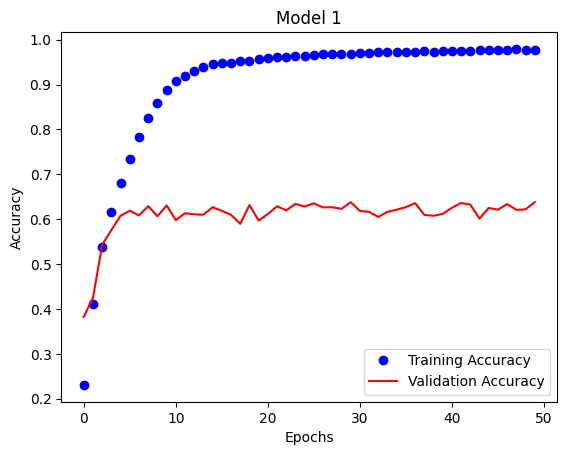

In [ ]:
# Plot the loss curve
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
plt.plot(epochs, valid_acc, 'r', label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 1")
plt.show()

## 4. Train (again) and evaluate the model (5 points)

- To this end, you have found the "best" hyper-parameters.
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [ ]:
#<Compile your model again (using the same hyper-parameters you tuned above)>
# Define model optimizer and loss function
from keras import optimizers

model.compile(optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#<Train your model on the entire training set (50K samples)>

history1 = model.fit(x_train, y_train_vec, batch_size=128, epochs=50)

Epoch 1/50
391/391 [==============================] - 71s 180ms/step - loss: 1.2323 - accuracy: 0.8211
Epoch 2/50
391/391 [==============================] - 70s 179ms/step - loss: 0.6468 - accuracy: 0.8704
Epoch 3/50
391/391 [==============================] - 71s 182ms/step - loss: 0.4532 - accuracy: 0.9015
Epoch 4/50
391/391 [==============================] - 71s 182ms/step - loss: 0.3666 - accuracy: 0.9188
Epoch 5/50
391/391 [==============================] - 71s 181ms/step - loss: 0.2977 - accuracy: 0.9314
Epoch 6/50
391/391 [==============================] - 70s 179ms/step - loss: 0.2574 - accuracy: 0.9397
Epoch 7/50
391/391 [==============================] - 71s 182ms/step - loss: 0.2393 - accuracy: 0.9469
Epoch 8/50
391/391 [==============================] - 71s 182ms/step - loss: 0.2341 - accuracy: 0.9503
Epoch 9/50
391/391 [==============================] - 71s 182ms/step - loss: 0.2111 - accuracy: 0.9557
Epoch 10/50
391/391 [==============================] - 71s 181ms/step - l

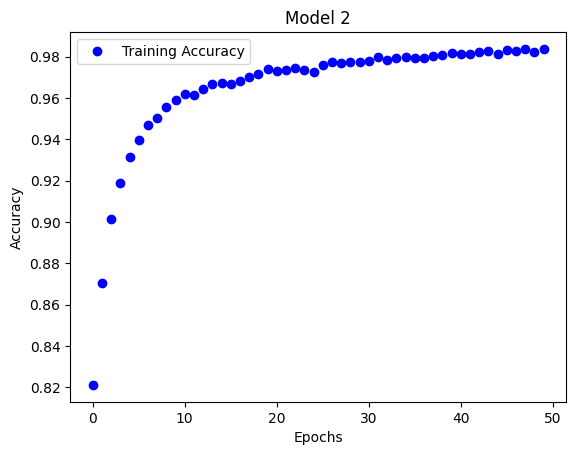

In [ ]:
plt.clf()
epochs = range(50)
train_acc = history1.history['accuracy']
plt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 2")
plt.show()

## 5. Evaluate the model on the test set (5 points)

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [ ]:
# Evaluate your model performance (testing accuracy) on testing data.
loss_and_acc = model.evaluate(x_test, y_test_vec)
print("loss: ", str(loss_and_acc[0]))
print("accuracy: ", str(loss_and_acc[1]))

313/313 [==============================] - 5s 16ms/step - loss: 16.7388 - accuracy: 0.6407
loss:  16.738849639892578
accuracy:  0.6406999826431274


## 6. Building model with new structure (25 points)
- In this section, you can build your model with adding new layers (e.g, BN layer or dropout layer, ...)
- If you want to regularize a ```Conv/Dense layer```, you should place a ```Dropout layer``` before the ```Conv/Dense layer```.
- You can try to compare their loss curve and testing accuracy and analyze your findings.
- You need to try at lease two different structures.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

model3 = Sequential()
model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(64, (4,4), activation='relu', input_shape=(15,15,3)))
model3.add(MaxPooling2D((2,2)))
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)             

In [ ]:
model3.compile(optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_tr,
                     y_tr,
                     batch_size=128,
                     epochs=50,
                     validation_data=(x_val, y_val))


Epoch 1/50
313/313 [==============================] - 68s 214ms/step - loss: 3.2198 - accuracy: 0.1281 - val_loss: 2.2955 - val_accuracy: 0.1171
Epoch 2/50
313/313 [==============================] - 65s 209ms/step - loss: 2.3032 - accuracy: 0.1713 - val_loss: 3.1923 - val_accuracy: 0.1400
Epoch 3/50
313/313 [==============================] - 62s 199ms/step - loss: 2.0913 - accuracy: 0.2800 - val_loss: 1.7746 - val_accuracy: 0.3836
Epoch 4/50
313/313 [==============================] - 62s 199ms/step - loss: 1.6801 - accuracy: 0.4020 - val_loss: 1.4456 - val_accuracy: 0.5077
Epoch 5/50
313/313 [==============================] - 59s 190ms/step - loss: 1.4690 - accuracy: 0.4829 - val_loss: 1.4241 - val_accuracy: 0.4991
Epoch 6/50
313/313 [==============================] - 62s 198ms/step - loss: 1.3499 - accuracy: 0.5338 - val_loss: 1.2354 - val_accuracy: 0.5741
Epoch 7/50
313/313 [==============================] - 61s 196ms/step - loss: 1.2570 - accuracy: 0.5684 - val_loss: 1.1449 - val_ac

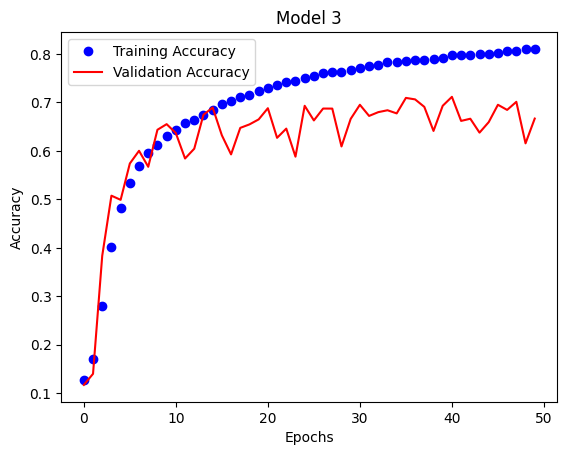

In [ ]:
# Plot the loss curve
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history3.history['accuracy']
valid_acc = history3.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label="Training Accuracy")
plt.plot(epochs, valid_acc, 'r', label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 3")
plt.show()

In [ ]:
# Evaluate your model performance (testing accuracy) on testing data.
loss_and_acc = model3.evaluate(x_test, y_test_vec)
print("loss: ", str(loss_and_acc[0]))
print("accuracy: ", str(loss_and_acc[1]))

313/313 [==============================] - 5s 14ms/step - loss: 1.1041 - accuracy: 0.6747
loss:  1.1041247844696045
accuracy:  0.6747000217437744


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

model4 = Sequential()
model4.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model4.add(MaxPooling2D((2,2)))
model4.add(Conv2D(64, (3,3), activation='relu'))
model4.add(MaxPooling2D((2,2)))
model4.add(Conv2D(128, (3,3), activation='relu'))
model4.add(MaxPooling2D((2,2)))
model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(10, activation='softmax'))



In [ ]:
model4.compile(optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
x_train_more = x_train.astype('float32') / 255
x_test_more = x_test.astype('float32') / 255

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator to the training data
datagen.fit(x_train_more)


batch_size = 32
epochs = 50

# Create the generator for training data
train_generator = datagen.flow(x_train_more, y_train_vec, batch_size=batch_size)

# Create the generator for validation data (optional)
validation_generator = datagen.flow(x_test_more, y_test_vec, batch_size=batch_size)



# Train the model using the generator
model4.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(x_test) // batch_size
)

Epoch 1/50
1562/1562 [==============================] - 115s 72ms/step - loss: 1.7965 - accuracy: 0.3309 - val_loss: 1.5841 - val_accuracy: 0.4185
Epoch 2/50
1562/1562 [==============================] - 112s 72ms/step - loss: 1.5426 - accuracy: 0.4378 - val_loss: 1.3950 - val_accuracy: 0.4953
Epoch 3/50
1562/1562 [==============================] - 112s 72ms/step - loss: 1.4332 - accuracy: 0.4829 - val_loss: 1.3169 - val_accuracy: 0.5270
Epoch 4/50
 257/1562 [===>..........................] - ETA: 1:24 - loss: 1.3934 - accuracy: 0.4987

In [ ]:
# Evaluate your model performance (testing accuracy) on testing data.
loss_and_acc = model4.evaluate(x_test, y_test_vec)
print("loss: ", str(loss_and_acc[0]))
print("accuracy: ", str(loss_and_acc[1]))